In [2]:
import pandas as pd

data = pd.read_csv(r'./files_for_lab/customer_churn.csv')


Load the dataset and explore the variables.

In [3]:
# View the first few rows of the dataset
display(data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# shape of the dataset
print ("number of rows in the dataseet:", data.shape[0])
print ("number of columns in the dataseet:", data.shape[1])

number of rows in the dataseet: 7043
number of columns in the dataseet: 21


In [10]:
#Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Generate summary statistics for numerical columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
# view column names
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
data.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [15]:
#change column names to lower case
data_new_column_names = []
for col in data.columns:
    data_new_column_names.append(col.lower())
data.columns = data_new_column_names
data.head()
# replacing White spaces in column names by _

data.columns = data.columns.str.replace(" ","-")
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [16]:
# Select predictor variables (X) and the target variable (y)
X = data[['tenure', 'seniorcitizen', 'monthlycharges']]
y = data['churn']

In [18]:
from sklearn.model_selection import train_test_split
#Split the Data
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.3 ,random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression
#Build the Logistic Regression Model:
logistic_reg_model = LogisticRegression()

# Fit the model to the training data
logistic_reg_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# make predictions on the test data.
y_pred = logistic_reg_model.predict(X_test)

Accuracy score in % : 79.0
Confusion Matrix:


array([[1420,  119],
       [ 317,  257]], dtype=int64)

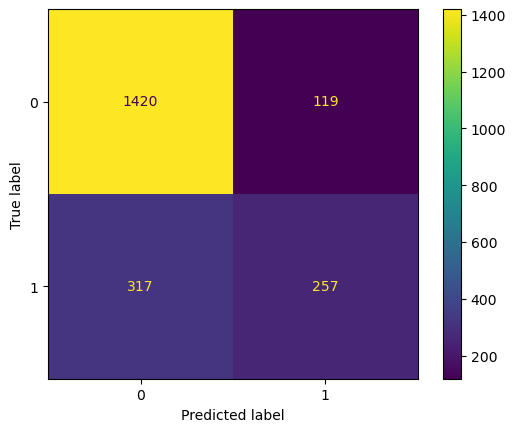

Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
# calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy score in % :", round(accuracy,2)*100)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
display(conf_matrix)
#display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Even a simple model will give us more than 70% accuracy. Why?

Answer
This is beacuse of imbalance, where one class (e.g., "No churn") significantly outweighs the other (e.g., "Churn". 
And model predicts the majority classand it does not effectively capture the minority class.

In [38]:
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [39]:
#Build the Logistic Regression Model:
logistic_reg_model2 = LogisticRegression()

# Fit the model to the training data
logistic_reg_model2.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [40]:
# make predictions on the test data.
y_pred2 = logistic_reg_model2.predict(X_test)

Accuracy score in % : 73.0
Confusion Matrix:


array([[1125,  414],
       [ 148,  426]], dtype=int64)

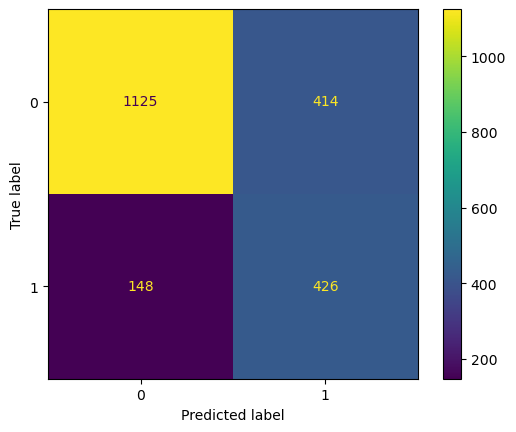

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.73      0.80      1539
         Yes       0.51      0.74      0.60       574

    accuracy                           0.73      2113
   macro avg       0.70      0.74      0.70      2113
weighted avg       0.78      0.73      0.75      2113



In [41]:
# calculate accuracy
accuracy2 = accuracy_score(y_test,y_pred2)
print("Accuracy score in % :", round(accuracy2,2)*100)

# Generate a confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix:')
display(conf_matrix2)
#display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix2)
disp.plot()
plt.show()
# Generate a classification report
class_report2 = classification_report(y_test, y_pred2)
print('Classification Report:')
print(class_report2)

there has been a trade-off between accuracy and the ability to correctly classify the minority class (churn) after applying SMOTE.
However, this improvement in correctly identifying churned customers has come at the cost of a slightly lower overall accuracy (73.0% compared to 79.0% without SMOTE)